In [1223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1224]:
df=pd.read_csv("C:/Users/Pichau/Desktop/TOTALISOTOTOTALISODONTO/planilha - particular 140625.csv")
df.columns=df.iloc[0]
df=df[1:]

In [1225]:

df = df.rename(columns={"DATA E HORA": "data_e_hora"})
df


,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,NaN
1,Francisco José Almeida da costa,85 8187-7894,Aldeota,Italo Castelo,21/02 ás 13:20,19/02/2025,NÃO COMPARECEU,Manu,ainda nao fechou
2,Claudiane Gomes da Silva,85 9816-0772,Maracanaú,Francisco Robério,27/03 ás 09:00,14/03/2025,NÃO COMPARECEU,Manu,NaN
3,SANDRO SOARES DE SOUZA,85 8168-0048,Bezerra,Italo Castelo,31/03 ás 18:00,26/03/2025,NÃO COMPARECEU,Manu,NaN
4,Suyanne Magalhães Paiva,85 8854-1408,Parangaba,José Irisvaldo,07/04 ás 18:30,26/03/2025,NÃO COMPARECEU,Manu,NaN
5,EMANUEL DE SOUZA BATISTA,5585987619153,Messejana,Marcia,28/03 ás 09:05,26/06/2025,COMPARECEU,Natan,NaN
...,...,...,...,...,...,...,...,...,...
363,ANDRESSA RYCHE SILVA DE ARAUJO,5585986440985,conjunto Ceará,carlos veras,17/06 as 10:20,12/06/2025,NaN,Natan,NaN
364,RAIZA CARLA SOUZA CUNHA,5585 8203 4220,bezerra,italo,16/05 ás 14:20,12/06/2025,NaN,Natan,NaN
365,DAYANE BORGES DO NASCIMENTO,85 9978-1957,aldeota,italo,13/06/2025,13/06/2025,NÃO COMPARECEU,Manu,NaN
366,MAGNA NAYARA DE SALES,5585986706432,messejana,lenilton,13/06 às 15:20,13/06/2025,NaN,Sara,NaN


In [1226]:
df["COMPARECEU OU NÃO"].value_counts()

COMPARECEU OU NÃO
NÃO COMPARECEU    182
COMPARECEU        107
REMARCADA          30
Name: count, dtype: int64

In [1227]:

df["data_formatada"] = df["data_e_hora"].str.extract(r"(\d{2}/\d{2})")[0]
df["data_formatada"]=pd.to_datetime(df["data_e_hora"]+"/2025",format="%d/%m/%Y",errors="coerce")

In [1228]:
df

,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,NaN,data_formatada
1,Francisco José Almeida da costa,85 8187-7894,Aldeota,Italo Castelo,21/02 ás 13:20,19/02/2025,NÃO COMPARECEU,Manu,ainda nao fechou,NaT
2,Claudiane Gomes da Silva,85 9816-0772,Maracanaú,Francisco Robério,27/03 ás 09:00,14/03/2025,NÃO COMPARECEU,Manu,NaN,NaT
3,SANDRO SOARES DE SOUZA,85 8168-0048,Bezerra,Italo Castelo,31/03 ás 18:00,26/03/2025,NÃO COMPARECEU,Manu,NaN,NaT
4,Suyanne Magalhães Paiva,85 8854-1408,Parangaba,José Irisvaldo,07/04 ás 18:30,26/03/2025,NÃO COMPARECEU,Manu,NaN,NaT
5,EMANUEL DE SOUZA BATISTA,5585987619153,Messejana,Marcia,28/03 ás 09:05,26/06/2025,COMPARECEU,Natan,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
363,ANDRESSA RYCHE SILVA DE ARAUJO,5585986440985,conjunto Ceará,carlos veras,17/06 as 10:20,12/06/2025,NaN,Natan,NaN,NaT
364,RAIZA CARLA SOUZA CUNHA,5585 8203 4220,bezerra,italo,16/05 ás 14:20,12/06/2025,NaN,Natan,NaN,NaT
365,DAYANE BORGES DO NASCIMENTO,85 9978-1957,aldeota,italo,13/06/2025,13/06/2025,NÃO COMPARECEU,Manu,NaN,NaT
366,MAGNA NAYARA DE SALES,5585986706432,messejana,lenilton,13/06 às 15:20,13/06/2025,NaN,Sara,NaN,NaT


In [ ]:

def extrair_data_hora(valor):
    match = re.search(r"(\d{2}/\d{2})(?:/(\d{4}))?.*?(\d{2}:\d{2})?", str(valor).lower())
    if match:
        dia_mes = match.group(1)
        ano = match.group(2) if match.group(2) else "2025"
        hora = match.group(3) if match.group(3) else "00:00"
        return f"{dia_mes}/{ano} {hora}"
    return None


df["data_hora_formatada"] = df["data_e_hora"].apply(extrair_data_hora)
df["data_hora_formatada"] = pd.to_datetime(df["data_hora_formatada"], format="%d/%m/%Y %H:%M", errors="coerce")


In [ ]:


def extrair_turno(data_str):
    data_str = str(data_str).lower().strip()

    # Corrigir separadores incomuns: 17;40 → 17:40
    data_str = data_str.replace(";", ":").replace(",", ":").replace("-", ":")

    # Tentativa 1: buscar padrão HH:MM
    match = re.search(r'(\d{1,2}):(\d{2})', data_str)
    if match:
        hora = int(match.group(1))
        minuto = int(match.group(2))
    else:
        # Tentativa 2: buscar HHh ou Hh → assume minutos = 0
        match = re.search(r'(\d{1,2})\s*h', data_str)
        if match:
            hora = int(match.group(1))
            minuto = 0
        else:
            # Tentativa 3: só número isolado antes de palavra (ex: "10-SEG") → assume hora cheia
            match = re.search(r'\b(\d{1,2})\b', data_str)
            if match:
                hora = int(match.group(1))
                minuto = 0
            else:
                return "Sem horário"

    # Classificar turno
    if 5 <= hora < 12:
        return "Manhã"
    elif 12 <= hora < 18:
        return "Tarde"
    elif 0 <= hora <= 23:
        return "Noite"
    else:
        return "Sem horário"
df["turno"] = df["data_e_hora"].apply(extrair_turno)


In [1231]:
df

,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,NaN,data_formatada,data_hora_formatada,turno
1,Francisco José Almeida da costa,85 8187-7894,Aldeota,Italo Castelo,21/02 ás 13:20,19/02/2025,NÃO COMPARECEU,Manu,ainda nao fechou,NaT,2025-02-21,Tarde
2,Claudiane Gomes da Silva,85 9816-0772,Maracanaú,Francisco Robério,27/03 ás 09:00,14/03/2025,NÃO COMPARECEU,Manu,NaN,NaT,2025-03-27,Manhã
3,SANDRO SOARES DE SOUZA,85 8168-0048,Bezerra,Italo Castelo,31/03 ás 18:00,26/03/2025,NÃO COMPARECEU,Manu,NaN,NaT,2025-03-31,Noite
4,Suyanne Magalhães Paiva,85 8854-1408,Parangaba,José Irisvaldo,07/04 ás 18:30,26/03/2025,NÃO COMPARECEU,Manu,NaN,NaT,2025-04-07,Noite
5,EMANUEL DE SOUZA BATISTA,5585987619153,Messejana,Marcia,28/03 ás 09:05,26/06/2025,COMPARECEU,Natan,NaN,NaT,2025-03-28,Manhã
...,...,...,...,...,...,...,...,...,...,...,...,...
363,ANDRESSA RYCHE SILVA DE ARAUJO,5585986440985,conjunto Ceará,carlos veras,17/06 as 10:20,12/06/2025,NaN,Natan,NaN,NaT,2025-06-17,Manhã
364,RAIZA CARLA SOUZA CUNHA,5585 8203 4220,bezerra,italo,16/05 ás 14:20,12/06/2025,NaN,Natan,NaN,NaT,2025-05-16,Tarde
365,DAYANE BORGES DO NASCIMENTO,85 9978-1957,aldeota,italo,13/06/2025,13/06/2025,NÃO COMPARECEU,Manu,NaN,NaT,2025-06-13,Tarde
366,MAGNA NAYARA DE SALES,5585986706432,messejana,lenilton,13/06 às 15:20,13/06/2025,NaN,Sara,NaN,NaT,2025-06-13,Tarde


In [1232]:
df.drop(columns=["data_formatada"],inplace=True)


In [1233]:
df = df.drop(columns=[float('nan')])


In [1234]:
df

,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,data_hora_formatada,turno
1,Francisco José Almeida da costa,85 8187-7894,Aldeota,Italo Castelo,21/02 ás 13:20,19/02/2025,NÃO COMPARECEU,Manu,2025-02-21,Tarde
2,Claudiane Gomes da Silva,85 9816-0772,Maracanaú,Francisco Robério,27/03 ás 09:00,14/03/2025,NÃO COMPARECEU,Manu,2025-03-27,Manhã
3,SANDRO SOARES DE SOUZA,85 8168-0048,Bezerra,Italo Castelo,31/03 ás 18:00,26/03/2025,NÃO COMPARECEU,Manu,2025-03-31,Noite
4,Suyanne Magalhães Paiva,85 8854-1408,Parangaba,José Irisvaldo,07/04 ás 18:30,26/03/2025,NÃO COMPARECEU,Manu,2025-04-07,Noite
5,EMANUEL DE SOUZA BATISTA,5585987619153,Messejana,Marcia,28/03 ás 09:05,26/06/2025,COMPARECEU,Natan,2025-03-28,Manhã
...,...,...,...,...,...,...,...,...,...,...
363,ANDRESSA RYCHE SILVA DE ARAUJO,5585986440985,conjunto Ceará,carlos veras,17/06 as 10:20,12/06/2025,NaN,Natan,2025-06-17,Manhã
364,RAIZA CARLA SOUZA CUNHA,5585 8203 4220,bezerra,italo,16/05 ás 14:20,12/06/2025,NaN,Natan,2025-05-16,Tarde
365,DAYANE BORGES DO NASCIMENTO,85 9978-1957,aldeota,italo,13/06/2025,13/06/2025,NÃO COMPARECEU,Manu,2025-06-13,Tarde
366,MAGNA NAYARA DE SALES,5585986706432,messejana,lenilton,13/06 às 15:20,13/06/2025,NaN,Sara,2025-06-13,Tarde


In [1235]:
df["turno"].value_counts()

turno
Tarde          183
Manhã          130
Noite           52
Sem horário      2
Name: count, dtype: int64

In [1236]:
sem_horario=df.loc[df["turno"]=="Sem horário"]

In [1237]:
df.drop(sem_horario.index,inplace=True)

In [1238]:
df["turno"].value_counts()

turno
Tarde    183
Manhã    130
Noite     52
Name: count, dtype: int64

In [1239]:
df

,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,data_hora_formatada,turno
1,Francisco José Almeida da costa,85 8187-7894,Aldeota,Italo Castelo,21/02 ás 13:20,19/02/2025,NÃO COMPARECEU,Manu,2025-02-21,Tarde
2,Claudiane Gomes da Silva,85 9816-0772,Maracanaú,Francisco Robério,27/03 ás 09:00,14/03/2025,NÃO COMPARECEU,Manu,2025-03-27,Manhã
3,SANDRO SOARES DE SOUZA,85 8168-0048,Bezerra,Italo Castelo,31/03 ás 18:00,26/03/2025,NÃO COMPARECEU,Manu,2025-03-31,Noite
4,Suyanne Magalhães Paiva,85 8854-1408,Parangaba,José Irisvaldo,07/04 ás 18:30,26/03/2025,NÃO COMPARECEU,Manu,2025-04-07,Noite
5,EMANUEL DE SOUZA BATISTA,5585987619153,Messejana,Marcia,28/03 ás 09:05,26/06/2025,COMPARECEU,Natan,2025-03-28,Manhã
...,...,...,...,...,...,...,...,...,...,...
363,ANDRESSA RYCHE SILVA DE ARAUJO,5585986440985,conjunto Ceará,carlos veras,17/06 as 10:20,12/06/2025,NaN,Natan,2025-06-17,Manhã
364,RAIZA CARLA SOUZA CUNHA,5585 8203 4220,bezerra,italo,16/05 ás 14:20,12/06/2025,NaN,Natan,2025-05-16,Tarde
365,DAYANE BORGES DO NASCIMENTO,85 9978-1957,aldeota,italo,13/06/2025,13/06/2025,NÃO COMPARECEU,Manu,2025-06-13,Tarde
366,MAGNA NAYARA DE SALES,5585986706432,messejana,lenilton,13/06 às 15:20,13/06/2025,NaN,Sara,2025-06-13,Tarde


In [1240]:
# Mapeamento de unidades (corrigido e padronizado)
mapeamento_unidades = {
    "bezerra": "Bezerra",
    "bezerta": "Bezerra",
    "bezerra'": "Bezerra",
    "berzerta": "Bezerra",
    "bezerra de menezes": "Bezerra De Menezes",

    "messejana": "Messejana",
    "parangaba": "Parangaba",
    "aldeota": "Aldeota",
    "centro": "Centro",

    "maracanau": "Maracanaú",      # sem acento
    "maracanaú": "Maracanaú",      # com acento

    "conjunto ceará": "Conjunto Ceará",
    "conjunto": "Conjunto Ceará"
}

# Aplicar o mapeamento à coluna UNIDADE
df['UNIDADE'] = df['UNIDADE'].str.strip().str.lower().replace(mapeamento_unidades).str.title()


In [1289]:
mapeamento_dentistas = {
    "italo castelo": "Italo Castelo",
    "dr italo": "Italo Castelo",

    "monatha": "Monatha",
    "dr monatha": "Monatha",

    "joana": "Joana",
    "dr joana": "Joana",

    "gabriela": "Gabriela",
    "dra gabriela": "Gabriela",
    "dr gabriel": "Gabriela",
    "gabriel": "Gabriela",

    "leticia": "Leticia",
    "leticia santos": "Leticia",

    "lilian cibele": "Lilian Cibele",

    "zeulier": "Zeulier",
    "dr zeulier": "Zeulier",

    "aline fernandes": "Allyne Fontenele",
    "aliny lessa": "Allyne Fontenele",
    "allyne": "Allyne Fontenele",
    "dr allyne": "Allyne Fontenele",

    "maritza": "Maritza",
    "dr maritza": "Maritza",

    "maria do socorro": "Maria Do Socorro",

    "cassio": "Cassio",
    "dr cassio": "Cassio",

    "carlos veras": "Carlos Veras",
    "carlos veraz": "Carlos Veras",
    "carlos eduardo": "Carlos Eduardo",
    "dr carlos": "Carlos Veras",

    "laura": "Laura Rodrigues",
    "dr laura": "Laura Rodrigues",

    "vanilde": "Vanilde Belo Aragão",
    "dr vanilde": "Vanilde Belo Aragão",

    "flavia": "Flavia",
    "dr flavia": "Flavia",

    "thais": "Thais Carolina",
    "thales": "Tales",
    "dr thais": "Thais Carolina",
    "dr tales": "Tales",

    "aparecida": "Aparecida",
    "dr aparecida": "Aparecida",

    "tales": "Tales",

    "jessey": "Jessey",
    "dr jessey": "Jessey",

    "carollyne": "Carollyne",
    "dr carollyne": "Carollyne",

    "joao vitor": "Joao Vitor",
    "dr joao vitor": "Joao Vitor",

    "ana mylena": "Ana Mylena",

    "fabio": "Fabio",

    "julio": "Julio",

    "marina": "Marina",

    "zeuderi": "Zeuderi",

    "silvio": "Silvio",

    "lennilton": "Lennilton",
}
# Aplicar o mapeamento
df['DENTISTA'] = df['DENTISTA'].str.strip().str.lower().replace(mapeamento_dentistas).str.title()

df.to_csv("df_inicial.csv",index=False)


In [1242]:
df['DENTISTA'].value_counts()




DENTISTA
Italo Castelo          76
Monatha                41
Gabriela               22
Joana                  13
Allyne Fontenele       12
                       ..
Vanilde Belo Aragão     1
Raquel                  1
Joanna                  1
Dr Igor                 1
Carlos                  1
Name: count, Length: 69, dtype: int64

In [1243]:
df['UNIDADE'].value_counts().head(7)

UNIDADE
Parangaba         105
Bezerra            73
Aldeota            62
Messejana          58
Centro             28
Maracanaú          23
Conjunto Ceará     12
Name: count, dtype: int64

In [1244]:
df["DENTISTA"].value_counts().head(10)

DENTISTA
Italo Castelo       76
Monatha             41
Gabriela            22
Joana               13
Allyne Fontenele    12
Leticia             11
Carlos Veras        10
Jessey              10
Marina               9
Thais Carolina       9
Name: count, dtype: int64

In [1245]:
# Filtrando os registros onde houve comparecimento
compareceu = df[df["COMPARECEU OU NÃO"] == "COMPARECEU"]

# Contando os agendamentos por dentista e unidade
agendamentos_por_dentista_clinica = compareceu.groupby(["DENTISTA", "UNIDADE"]).size().reset_index(name="Agendamentos")




In [1246]:
tabela_pivot = pd.pivot_table(
    agendamentos_por_dentista_clinica,
    index="DENTISTA",
    columns="UNIDADE",
    values="Agendamentos",
    aggfunc="sum",
    fill_value=0
)

# Adicionando a coluna 'Total' com a soma dos agendamentos por dentista
tabela_pivot['Total'] = tabela_pivot.sum(axis=1)
tabela_pivot_sorted = tabela_pivot.sort_values(by='Total', ascending=False)

# Selecionando os 10 dentistas com maior número de agendamentos
top_dentistas = tabela_pivot_sorted.head(10)


In [1290]:
tabela_pivot_sorted.to_csv("tabela comparecimento.csv")

In [1248]:
top_dentistas

UNIDADE,Aldeota,Bezerra,Bezerra De Menezes,Centro,Conjunto Ceará,Maracanaú,Messejana,Parangaba,Total
DENTISTA,,,,,,,,,
Italo Castelo,4,12,1,1,0,0,0,1,19
Monatha,2,3,0,0,0,0,0,6,11
Gabriela,1,1,0,0,0,0,0,6,8
Joana,0,0,0,7,0,0,0,0,7
Leticia,1,0,0,0,0,2,4,0,7
Carlos Veras,0,0,0,0,0,0,1,2,3
Allyne Fontenele,2,0,0,1,0,0,0,0,3
Carollyne,0,0,0,0,2,1,0,0,3
Laura Rodrigues,0,1,0,0,1,1,0,0,3


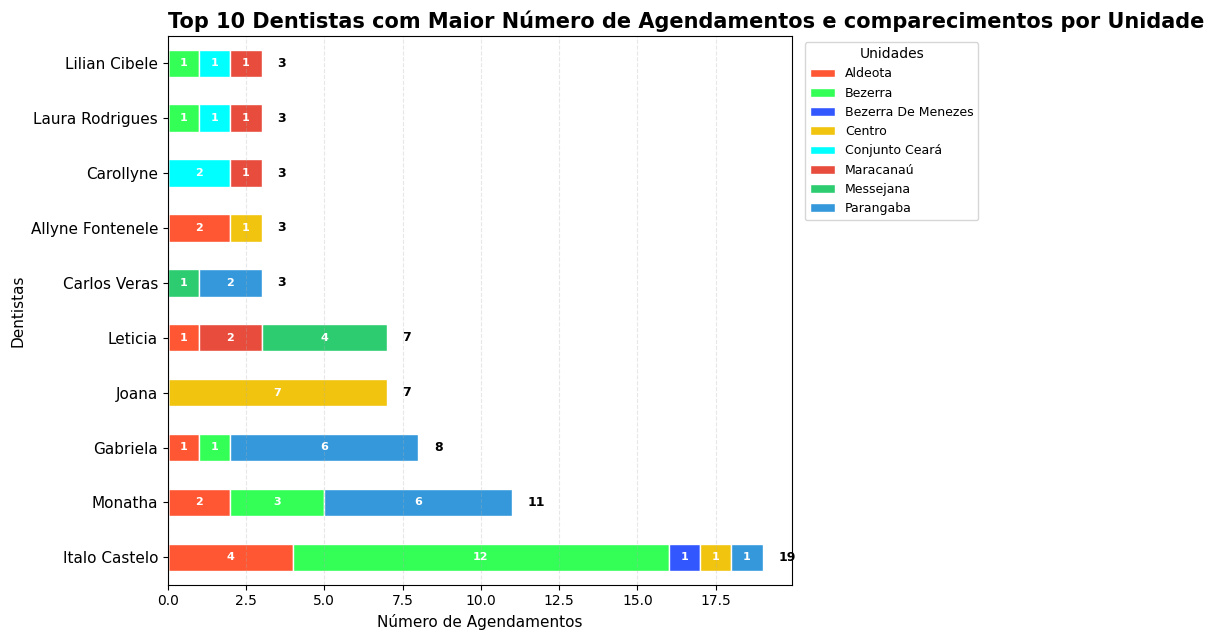

In [1249]:
import matplotlib.pyplot as plt

# Cores para cada unidade
cores = ["#FF5733", "#33FF57", "#3357FF", "#F1C40F", "cyan", "#E74C3C", "#2ECC71", "#3498DB", "#9B59B6"]

# Remove a coluna 'Total' para o gráfico
top_dentistas_sem_total = top_dentistas.drop(columns="Total")

# Plot do gráfico (figsize reduzido)
fig, ax = plt.subplots(figsize=(10, 6.5))
top_dentistas_sem_total.plot(
    kind="barh",
    stacked=True,
    color=cores[:len(top_dentistas_sem_total.columns)],
    ax=ax,
    edgecolor='white'
)

# Título e rótulos
ax.set_title("Top 10 Dentistas com Maior Número de Agendamentos e comparecimentos por Unidade", fontsize=15, loc='left', weight="bold")
ax.set_xlabel("Número de Agendamentos", fontsize=11)
ax.set_ylabel("Dentistas", fontsize=11)
ax.set_yticklabels(top_dentistas.index, fontsize=11)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_facecolor("white")
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Valores dentro dos containers (barras empilhadas)
for container in ax.containers:
    labels = [int(v) if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=8, color="white", fontweight="bold")

# Totais ao final das barras
for i, total in enumerate(top_dentistas["Total"]):
    ax.text(
        total + 0.5, i, str(int(total)),
        va="center", ha="left", fontsize=9, fontweight="bold", color="black"
    )

# Legenda lateral
ax.legend(
    title="Unidades",
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


In [1250]:
nao_compareceu=df[df["COMPARECEU OU NÃO"] == "NÃO COMPARECEU"]
faltas_por_dentista_clinica=nao_compareceu.groupby(["DENTISTA","UNIDADE"]).size().reset_index(name="Faltas")

In [1291]:
tabela_pivot_faltas=pd.pivot_table(
    faltas_por_dentista_clinica,
    index="DENTISTA",
    columns="UNIDADE",
    values="Faltas",
    aggfunc="sum",
    fill_value=0
)
tabela_pivot_faltas["Total"]=tabela_pivot_faltas.sum(axis=1)
tabela_pivot_sorted_faltas=tabela_pivot_faltas.sort_values(by="Total",ascending=False)
top_dentistas_faltas=tabela_pivot_sorted_faltas.head(10)
top_dentistas_faltas.to_csv("tabela faltas.csv")

In [1252]:
tabela_pivot_sorted_faltas

UNIDADE,Aldeota,Bezerra,Centro,Conjunto Ceará,Maracanaú,Messejana,Parangaba,Total
DENTISTA,,,,,,,,
Italo Castelo,10,13,2,0,0,0,12,37
Monatha,5,0,0,0,0,0,14,19
Gabriela,1,0,0,0,0,0,9,10
Allyne Fontenele,1,0,4,1,0,2,0,8
Marina,0,0,0,0,0,6,0,6
Jessey,0,0,0,0,0,5,0,5
Lilian Cibele,0,3,0,0,1,0,1,5
Carlos Antonio Veraz,0,0,0,2,0,0,2,4
Carlos Eduardo,0,1,0,0,0,1,2,4


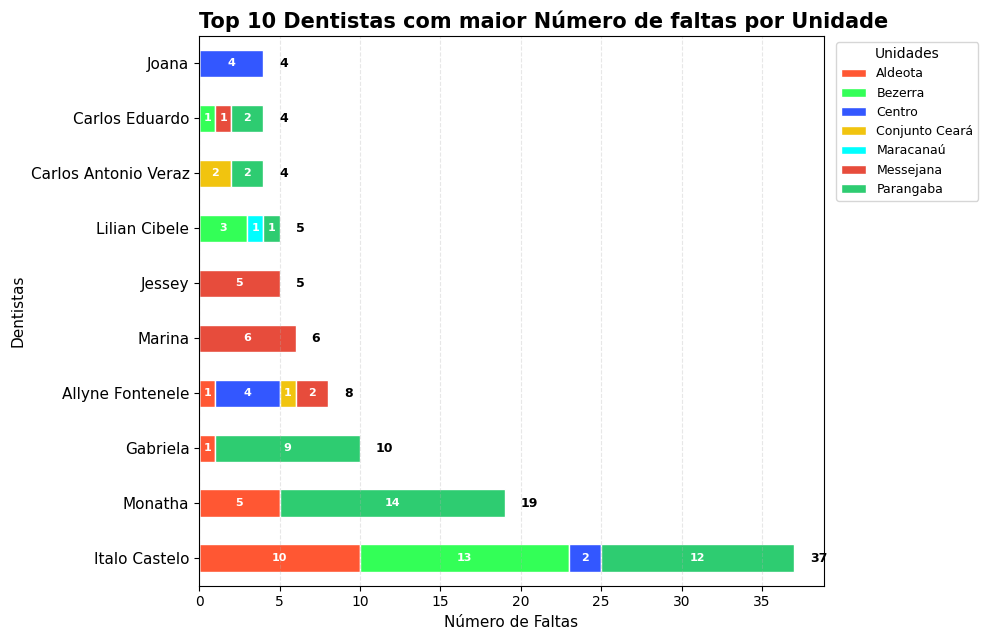

In [1253]:

cores = ["#FF5733", "#33FF57", "#3357FF", "#F1C40F", "cyan", "#E74C3C", "#2ECC71", "#3498DB", "#9B59B6"]
top_dentistas_faltas_sem_total=top_dentistas_faltas.drop(columns="Total")
fig,ax=plt.subplots(figsize=(10, 6.5))
top_dentistas_faltas_sem_total.plot(
    kind="barh",
    stacked=True,
    color=cores[:len(top_dentistas_faltas_sem_total.columns)],
    ax=ax,
    edgecolor="white")

ax.set_title("Top 10 Dentistas com maior Número de faltas por Unidade", fontsize=15, loc='left', weight="bold")
ax.set_xlabel("Número de Faltas", fontsize=11)
ax.set_ylabel("Dentistas", fontsize=11)

ax.set_yticklabels(top_dentistas_faltas.index,fontsize=11)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_facecolor("white")
ax.grid(axis='x', linestyle='--', alpha=0.3)
for container in ax.containers:
    labels=[int(v) if v>0 else"" for v in container.datavalues]
    ax.bar_label(container,labels=labels,label_type="center",fontsize=8,
                 color="white",fontweight="bold")
for i, total in enumerate(top_dentistas_faltas["Total"]):
    ax.text(
        total + 1, i, str(int(total)),
        va="center", ha="left", fontsize=9, fontweight="bold", color="black"
    )

# Legenda lateral
ax.legend(
    title="Unidades",
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


In [1254]:
comparecimento_por_turno=compareceu.groupby(["DENTISTA", "UNIDADE","turno"]).size().reset_index()
comparecimento_por_turno["turno"].value_counts()

turno
Manhã    35
Tarde    29
Noite    14
Name: count, dtype: int64

In [1255]:
comparecimento_por_turno

,DENTISTA,UNIDADE,turno,0
0,Alicia,Parangaba,Manhã,1
1,Allyne Fontenele,Aldeota,Manhã,1
2,Allyne Fontenele,Aldeota,Tarde,1
3,Allyne Fontenele,Centro,Manhã,1
4,Ana Mylena,Messejana,Manhã,1
...,...,...,...,...
73,Vanilde Belo Aragão,Bezerra,Tarde,1
74,Zeuderi,Aldeota,Manhã,1
75,Zeulier,Bezerra,Manhã,1
76,Zeulier,Bezerra,Noite,1


In [1256]:
# Tabela dinâmica: dentista x unidade x turno
tabela_comparecimento = pd.pivot_table(
    comparecimento_por_turno,
    index=['DENTISTA', 'UNIDADE'],
    columns='turno',
    values=0,  # ou use o nome da coluna se não for 0
    aggfunc='sum',
    fill_value=0
)

# Opcional: ordenar por total
tabela_comparecimento["Total"] = tabela_comparecimento.sum(axis=1)
tabela_comparecimento = tabela_comparecimento.sort_values(by="Total", ascending=False)

# Exibir a tabela
tabela_comparecimento

,turno,Manhã,Noite,Tarde,Total
DENTISTA,UNIDADE,,,,
Italo Castelo,Bezerra,3,5,4,12
Joana,Centro,2,1,4,7
Gabriela,Parangaba,1,1,4,6
Monatha,Parangaba,0,1,5,6
Italo Castelo,Aldeota,0,1,3,4
...,...,...,...,...,...
Tales,Maracanaú,0,1,0,1
Vanilde Belo,Bezerra,0,0,1,1
Vanilde Belo Aragão,Bezerra,0,0,1,1


In [1257]:
print("Total de comparecimentos por turno:")
print("Comparecimentos no turno da Manhã:",tabela_comparecimento["Manhã"].sum())
print("Comparecimentos no turno da Tarde:",tabela_comparecimento["Tarde"].sum()) 
print("Comparecimentos no turno da Noite:",tabela_comparecimento["Noite"].sum())

Total de comparecimentos por turno:
Comparecimentos no turno da Manhã: 39
Comparecimentos no turno da Tarde: 49
Comparecimentos no turno da Noite: 19


In [1258]:
df_vendas=pd.read_csv("C:/Users/Pichau/Desktop/TOTALISOTOTOTALISODONTO/tabela_vendas_particulares.csv")
df_vendas

,__-_,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU,NaN,META MENSAL DE ABRIL,NaN
1,5047040-ERICA DA SILVA VASCONCELOS,85989946630,MARACANAU,LETICIA SANTOS,"R$ 1.500,00","1,00%",PRÓTESE FLEX,28/03 ÁS 08:20,"R$ 15,00",Manu,NaN,PROCEDIMENTO,"R$ 10.000,00"
2,5058415-Mateus Cruz Soares,85981508303,MESSEJANA,MARINA,"R$ 80,00",1%,Contrato - Orto,31/03 ás 10:00,"R$ 0,80",Natan,NaN,ORTODONTIA,40 AGENDAMENTOS
3,4664590 - GEICIANE NASCIMENTO,85988667658,BEZERRA,MARIA DO SOCORRO,"R$ 240,00","1,00%",LIMPEZA II,29/03 ás 10:10,"R$ 2,40",Natan,NaN,NaN,NaN
4,5058469 - MARIA ISABEL DE SOUSA BRITO,85996877120,BEZERRA,VANILDE BELO ARAGÃO,"R$ 125,00",1%,Manutenção ortodontico,31/03/2025 14:20,"R$ 1,25",Stephanie,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Df_Vendas

In [1259]:
df_vendas = df_vendas.head(65)
df_vendas.columns = df_vendas.iloc[0]
df_vendas = df_vendas[1:]
# Exemplo: para remover as 10 primeiras colunas
df_vendas.drop(columns=df_vendas.columns[10:], inplace=True)
df_vendas

,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU
1,5047040-ERICA DA SILVA VASCONCELOS,85989946630,MARACANAU,LETICIA SANTOS,"R$ 1.500,00","1,00%",PRÓTESE FLEX,28/03 ÁS 08:20,"R$ 15,00",Manu
2,5058415-Mateus Cruz Soares,85981508303,MESSEJANA,MARINA,"R$ 80,00",1%,Contrato - Orto,31/03 ás 10:00,"R$ 0,80",Natan
3,4664590 - GEICIANE NASCIMENTO,85988667658,BEZERRA,MARIA DO SOCORRO,"R$ 240,00","1,00%",LIMPEZA II,29/03 ás 10:10,"R$ 2,40",Natan
4,5058469 - MARIA ISABEL DE SOUSA BRITO,85996877120,BEZERRA,VANILDE BELO ARAGÃO,"R$ 125,00",1%,Manutenção ortodontico,31/03/2025 14:20,"R$ 1,25",Stephanie
5,5058690 - TALITA PINHEIRO VITORINO,85988806704,MESSEJANA,CARLOS EDUARDO,"R$ 200,00","1,00%",EXODONTIA,01/04 ÁS 17:30,"R$ 2,00",Manu
...,...,...,...,...,...,...,...,...,...,...
60,5065836 - DAVI PARENTE RODRIGUES,85981122028,MESSEJANA,fabio,"R$ 140,00","1,00%",limpeza Odontopediatrica,10/06 ás 10:00,"R$ 1,40",Manu
61,5065293-ANTONIO JOSE FERREIRA DA SILVA,85997189227,MESSEJANA,Lennilton,"R$ 400,00","1,00%",RECONSTRUÇÃO TIPO V UD 21,03/06 ás 18:15,"R$ 4,00",Manu
62,5066056-JANDHA MARA EVANGELISTA GOMES,85999977877,PARANGABA,jessey,"R$ 220,00","1,00%","LIMPEZA II - TARTARECTOMIA , PROFILAXIA",12/06 ás 11;30,"R$ 1,40",Manu
63,5066143-IGOR BARBOSA DA SILVA,85987556236,PARANGABA,Monatha,"R$ 115,00","1,00%",RASPAGEM SUPRA-GENGIVA,13/06 ás 16:00,"R$ 1,15",Manu


In [1260]:
mapeamento_dentistas = {
    "italo castelo": "Italo Castelo",
    "dr italo": "Italo Castelo",

    "monatha": "Monatha",
    "dr monatha": "Monatha",

    "joana": "Joana",
    "dr joana": "Joana",

    "gabriela": "Gabriela",
    "dra gabriela": "Gabriela",
    "dr gabriel": "Gabriela",
    "gabriel": "Gabriela",

    "leticia": "Leticia",
    "leticia santos": "Leticia",

    "lilian cibele": "Lilian Cibele",

    "zeulier": "Zeulier",
    "dr zeulier": "Zeulier",

    "aline fernandes": "Allyne Fontenele",
    "aliny lessa": "Allyne Fontenele",
    "allyne": "Allyne Fontenele",
    "dr allyne": "Allyne Fontenele",

    "maritza": "Maritza",
    "dr maritza": "Maritza",

    "maria do socorro": "Maria Do Socorro",

    "cassio": "Cassio",
    "dr cassio": "Cassio",

    "carlos veras": "Carlos Veras",
    "carlos veraz": "Carlos Veras",
    "carlos eduardo": "Carlos Eduardo",
    "dr carlos": "Carlos Veras",

    "laura": "Laura Rodrigues",
    "dr laura": "Laura Rodrigues",

    "vanilde": "Vanilde Belo Aragão",
    "dr vanilde": "Vanilde Belo Aragão",

    "flavia": "Flavia",
    "dr flavia": "Flavia",

    "thais": "Thais Carolina",
    "thales": "Tales",
    "dr thais": "Thais Carolina",
    "dr tales": "Tales",

    "aparecida": "Aparecida",
    "dr aparecida": "Aparecida",

    "tales": "Tales",

    "jessey": "Jessey",
    "dr jessey": "Jessey",

    "carollyne": "Carollyne",
    "dr carollyne": "Carollyne",

    "joao vitor": "Joao Vitor",
    "dr joao vitor": "Joao Vitor",

    "ana mylena": "Ana Mylena",

    "fabio": "Fabio",

    "julio": "Julio",

    "marina": "Marina",

    "zeuderi": "Zeuderi",

    "silvio": "Silvio",

    "lennilton": "Lennilton",
}

# Aplicar o mapeamento
df_vendas['DENTISTA'] = df_vendas['DENTISTA'].str.strip().str.lower().replace(mapeamento_dentistas).str.title()




In [1261]:
# Mapeamento de unidades (corrigido e padronizado)
mapeamento_unidades = {
    "bezerra": "Bezerra",
    "bezerta": "Bezerra",
    "bezerra'": "Bezerra",
    "berzerta": "Bezerra",
    "bezerra de menezes": "Bezerra De Menezes",

    "messejana": "Messejana",
    "parangaba": "Parangaba",
    "aldeota": "Aldeota",
    "centro": "Centro",

    "maracanau": "Maracanaú",      # sem acento
    "maracanaú": "Maracanaú",      # com acento

    "conjunto ceará": "Conjunto Ceará",
    "conjunto": "Conjunto Ceará"
}

# Aplicar o mapeamento à coluna UNIDADE
df_vendas['UNIDADE'] = df_vendas['UNIDADE'].str.strip().str.lower().replace(mapeamento_unidades).str.title()


In [1292]:
df_vendas.to_csv("tabela_vendas_particulares.csv", index=False)

In [1263]:
for col in df_vendas.columns:
    print(f"'{col}' --> {[ord(c) for c in col]}")


'NOME E ID' --> [78, 79, 77, 69, 32, 69, 32, 73, 68]
'TELEFONE' --> [84, 69, 76, 69, 70, 79, 78, 69]
'UNIDADE' --> [85, 78, 73, 68, 65, 68, 69]
'DENTISTA' --> [68, 69, 78, 84, 73, 83, 84, 65]
' VALOR ' --> [32, 86, 65, 76, 79, 82, 32]
'PORCENTAGEM' --> [80, 79, 82, 67, 69, 78, 84, 65, 71, 69, 77]
'PROCEDIMENTO' --> [80, 82, 79, 67, 69, 68, 73, 77, 69, 78, 84, 79]
'DATA E HORA' --> [68, 65, 84, 65, 32, 69, 32, 72, 79, 82, 65]
'Total' --> [84, 111, 116, 97, 108]
'QUEM AGENDOU' --> [81, 85, 69, 77, 32, 65, 71, 69, 78, 68, 79, 85]


In [1264]:
def limpar_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace("R$", "").replace(".", "").replace(",", ".").strip()
    return float(valor)

df_vendas[" VALOR "] = df_vendas[" VALOR "].apply(limpar_valor)
df_vendas["TOTAL"] = df_vendas["Total"].apply(limpar_valor)



In [1265]:
df_vendas["DENTISTA"].value_counts().sort_values(ascending=False)

DENTISTA
Leticia                7
Gabriela               5
Joana                  5
Italo Castelo          4
Silvio                 4
Ana Mylena             3
Jessey                 3
Allyne Fontenele       3
Monatha                3
Lilian Cibele          3
Laura Rodrigues        2
Carlos Eduardo         2
Carollyne              2
Tales                  2
Lennilton              2
Carlos Veras           2
Maria Do Socorro       1
Marina                 1
Maritza                1
Vanilde Belo Aragão    1
Cassio                 1
Erica                  1
Zeuderi                1
Zeulier                1
Julio                  1
Thais Carolina         1
Flavia                 1
Fabio                  1
Name: count, dtype: int64

In [1266]:
df_vendas.loc[df_vendas["DENTISTA"]=="Italo Castelo"]

,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU,TOTAL
13,5022912 - ROSA DOMICILIA MOREIRA ARAGAO DE LIMA,85999924974,Aldeota,Italo Castelo,240.0,"1,00%",MANUTENÇÃO DE PRÓTESE,05/04 ÁS 10:05,"R$ 2,40",Manu,2.4
17,5060705-MARIA IOLINDA CARDOSO COSTA,85989407212,Bezerra,Italo Castelo,1500.0,"1,00%",IMPLANTE ESPECIAL UD 37,12/04 ÁS 08:20,"R$ 15,00",Manu,15.0
37,5062510-MARIO GLADSTON DA SILVA FIDELES,85994132328,Bezerra,Italo Castelo,260.0,"1,00%",MANUTENÇÃO IMPLANTE,10/05 ás 11:20,"R$ 2,60",Stephanie,2.6
44,4657298 - ELIDIANE LOURENCO DOS SANTOS,85)98929.3995,Bezerra,Italo Castelo,1500.0,"1,00%",IMPLANTE ESPECIAL UD 21,20/05 ás 09:00,"R$ 15,00",Natan,15.0


In [1267]:
df_vendas.loc[df_vendas["DENTISTA"]=="Leticia"]

,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU,TOTAL
1,5047040-ERICA DA SILVA VASCONCELOS,85989946630,Maracanaú,Leticia,1500.0,"1,00%",PRÓTESE FLEX,28/03 ÁS 08:20,"R$ 15,00",Manu,15.00
23,5060030 - CICERO RAPHAEL FEITOZA,34991122148,Maracanaú,Leticia,380.0,"1,00%",REMOÇÃO DE SISO,16/04 ÁS 17:00,"R$ 3,80",Stephanie,3.80
30,5047633 - PATRICIA COSTA FERNANDES,85996847248,Messejana,Leticia,1600.0,"1,00%",COROA TOTAL METALO CERÂMICA,17/05 ÁS 15;00,"R$ 16,00",Stephanie,16.00
36,5062887 - ALINE SILVA ALVES,85987736660,Messejana,Leticia,750.0,"1,00%",CLAREAMENTO DENTAL MISTO,08/05 ás 16:40,"R$ 7,50",Manu,7.50
42,5063490 - MARIA LENIR SANTOS DA SILVA,85987787899,Messejana,Leticia,1600.0,"1,00%",PRÓTESE PARCIAL REMOVÍVEL COM GRAMPOS BILATERAL,15/05 ás 15:20,"R$ 16,00",Manu,16.00
45,5053380-VALDOMIRA TINTINO DE OLIVEIRA,85996598037,Aldeota,Leticia,427.5,"1,00%",RECONSTRUÇÃO TIPO V UD 36,24/05 ás 09:20,"R$ 4,27",Manu,4.27
51,5063468-VINICIUS RIBEIRO RODRIGUES,85998300400,Messejana,Leticia,349.0,"1,00%",limpeza e restauração,15/05 ás 14;00,"R$ 3,49",Manu,3.49


In [1268]:
compareceu.loc[compareceu["DENTISTA"]=="Leticia"]

,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,data_hora_formatada,turno
14,ERICA DA SILVA VASCONCELOS,85 8994-6630,Maracanaú,Leticia,28/03 ás 08:20,26/03/2025,COMPARECEU,Manu,2025-03-28,Manhã
28,MARIA NAIDE BINDAR DE BRITO,85994012780,Messejana,Leticia,31/03 ás 15:30,31/03,COMPARECEU,Manu,2025-03-31,Tarde
72,Cicero Raphael Feitoza,85 9129-6894,Maracanaú,Leticia,16/04 ás 17:00,03/04/2025,COMPARECEU,Stephanie,2025-04-16,Tarde
184,Vinicius Ribeiro Rodrigues,85 9907-5318,Messejana,Leticia,15/05 ás 14:30,05/05/2025,COMPARECEU,Manu,2025-05-15,Tarde
199,ALINE SILVA ALVES,351 935 712 832,Messejana,Leticia,08/05 ás 16:40,07/05/2025,COMPARECEU,Manu,2025-05-08,Tarde
215,MARIA LENIR SANTOS DA SILVA,85 8778-7899,Messejana,Leticia,15/05 ás 15:20,12/05/2025,COMPARECEU,Manu,2025-05-15,Tarde
263,Valdomira Tintino de Oliveira,85 9659-8037,Aldeota,Leticia,24/05 ás 09:20,22/05,COMPARECEU,Manu,2025-05-24,Manhã


In [1269]:
nao_compareceu.loc[nao_compareceu["DENTISTA"]=="Leticia"]

,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,data_hora_formatada,turno
24,Andson Gabriel Lima da Silva,85 8538-5628,Messejana,Leticia,03/04 ás 15:00,28/03/2025,NÃO COMPARECEU,Manu,2025-04-03,Tarde
171,Camila Dutra Rodrigues,85 9172-3385,Maracanaú,Leticia,02/05/2025 14:30,29/04/2025,NÃO COMPARECEU,Sthephanie,2025-05-02,Tarde
296,Eugênia Kátia Araújo Ribeiro,85 9602-8729,Messejana,Leticia,09/06 ás 15:40,29/05/2025,NÃO COMPARECEU,Manu,2025-06-09,Tarde


In [1270]:
maiores_vendas_por_dentista=df_vendas.groupby(["DENTISTA", "UNIDADE"]).agg(
    Total_Vendas=(' VALOR ', 'sum')
).reset_index().sort_values(by='Total_Vendas', ascending=False)
maiores_vendas_por_dentista

,DENTISTA,UNIDADE,Total_Vendas
14,Gabriela,Parangaba,4695.0
25,Leticia,Messejana,4299.0
16,Italo Castelo,Bezerra,3260.0
31,Monatha,Parangaba,2610.0
24,Leticia,Maracanaú,1880.0
18,Joana,Centro,1775.0
0,Allyne Fontenele,Centro,1380.0
26,Lilian Cibele,Bezerra,1330.0
36,Thais Carolina,Aldeota,1260.0
22,Lennilton,Messejana,750.0


In [1271]:
fechamentos = df_vendas['DENTISTA'].value_counts().reset_index()
fechamentos.columns = ['DENTISTA', 'Fechamentos']

# Exibir a tabela ordenada
fechamentos = fechamentos.sort_values(by='Fechamentos', ascending=False)
fechamentos

,DENTISTA,Fechamentos
0,Leticia,7
1,Gabriela,5
2,Joana,5
3,Italo Castelo,4
4,Silvio,4
5,Ana Mylena,3
6,Jessey,3
7,Allyne Fontenele,3
8,Monatha,3
9,Lilian Cibele,3


In [1272]:
# 1. Fechamentos por dentista
fechamentos = df_vendas['DENTISTA'].value_counts().reset_index()
fechamentos.columns = ['DENTISTA', 'Fechamentos']

# 2. Produção total por dentista
producao_total = df_vendas.groupby('DENTISTA')[' VALOR '].sum().reset_index()
producao_total.columns = ['DENTISTA', 'Total_Produzido']

# 3. Agendamentos totais (a partir da tabela pivot com soma por dentista)
agendamentos_total = tabela_pivot_sorted[['Total']].reset_index()
agendamentos_total.columns = ['DENTISTA', 'Agendamentos_comparecidos']

# 4. Juntar tudo
df_final = fechamentos.merge(producao_total, on='DENTISTA', how='outer')
df_final = df_final.merge(agendamentos_total, on='DENTISTA', how='outer')

# 5. Preencher valores ausentes com 0 (caso algum dentista não esteja em todas as tabelas)
df_final.fillna(0, inplace=True)

# 6. Ordenar por produção total ou outro critério desejado
df_final = df_final.sort_values(by='Total_Produzido', ascending=False)

# Exibir
df_final=df_final.reset_index(drop=True)
df_final


,DENTISTA,Fechamentos,Total_Produzido,Agendamentos_comparecidos
0,Leticia,7.0,6606.5,7.0
1,Gabriela,5.0,4820.0,8.0
2,Italo Castelo,4.0,3500.0,19.0
3,Monatha,3.0,2610.0,11.0
4,Joana,5.0,1775.0,7.0
5,Lilian Cibele,3.0,1695.0,3.0
6,Allyne Fontenele,3.0,1480.0,3.0
7,Thais Carolina,1.0,1260.0,2.0
8,Lennilton,2.0,750.0,0.0
9,Carlos Eduardo,2.0,700.0,1.0


In [1273]:

# 7. Extrair total de faltas por dentista
faltas_total = tabela_pivot_sorted_faltas[['Total']].reset_index()
faltas_total.columns = ['DENTISTA', 'Agendamentos_faltosos']

# 8. Juntar ao df_final
df_final = df_final.merge(faltas_total, on='DENTISTA', how='left')

# 9. Preencher possíveis NaNs com 0
df_final['Agendamentos_faltosos'] = df_final['Agendamentos_faltosos'].fillna(0).astype(int)
df_final['Fechamentos'] = df_final['Fechamentos'].fillna(0).astype(int)

df_final

,DENTISTA,Fechamentos,Total_Produzido,Agendamentos_comparecidos,Agendamentos_faltosos
0,Leticia,7,6606.5,7.0,3
1,Gabriela,5,4820.0,8.0,10
2,Italo Castelo,4,3500.0,19.0,37
3,Monatha,3,2610.0,11.0,19
4,Joana,5,1775.0,7.0,4
5,Lilian Cibele,3,1695.0,3.0,5
6,Allyne Fontenele,3,1480.0,3.0,8
7,Thais Carolina,1,1260.0,2.0,4
8,Lennilton,2,750.0,0.0,1
9,Carlos Eduardo,2,700.0,1.0,4


In [1274]:

# Criar a nova coluna com o total
df_final['Agendamentos_totais'] = df_final['Agendamentos_comparecidos'] + df_final['Agendamentos_faltosos']
df_final.head(28)



,DENTISTA,Fechamentos,Total_Produzido,Agendamentos_comparecidos,Agendamentos_faltosos,Agendamentos_totais
0,Leticia,7,6606.5,7.0,3,10.0
1,Gabriela,5,4820.0,8.0,10,18.0
2,Italo Castelo,4,3500.0,19.0,37,56.0
3,Monatha,3,2610.0,11.0,19,30.0
4,Joana,5,1775.0,7.0,4,11.0
5,Lilian Cibele,3,1695.0,3.0,5,8.0
6,Allyne Fontenele,3,1480.0,3.0,8,11.0
7,Thais Carolina,1,1260.0,2.0,4,6.0
8,Lennilton,2,750.0,0.0,1,1.0
9,Carlos Eduardo,2,700.0,1.0,4,5.0


In [1275]:
df_final[(df_final['Fechamentos'] > 0) & (df_final['Agendamentos_comparecidos'] == 0)]


,DENTISTA,Fechamentos,Total_Produzido,Agendamentos_comparecidos,Agendamentos_faltosos,Agendamentos_totais
8,Lennilton,2,750.0,0.0,1,1.0
27,Julio,1,60.0,0.0,0,0.0


In [1276]:
cond = (df_final['Fechamentos'] > 0) & (df_final['Agendamentos_comparecidos'] == 0)
df_final.loc[cond, 'Agendamentos_comparecidos'] = df_final.loc[cond, 'Fechamentos']


In [1277]:
df_final

,DENTISTA,Fechamentos,Total_Produzido,Agendamentos_comparecidos,Agendamentos_faltosos,Agendamentos_totais
0,Leticia,7,6606.5,7.0,3,10.0
1,Gabriela,5,4820.0,8.0,10,18.0
2,Italo Castelo,4,3500.0,19.0,37,56.0
3,Monatha,3,2610.0,11.0,19,30.0
4,Joana,5,1775.0,7.0,4,11.0
5,Lilian Cibele,3,1695.0,3.0,5,8.0
6,Allyne Fontenele,3,1480.0,3.0,8,11.0
7,Thais Carolina,1,1260.0,2.0,4,6.0
8,Lennilton,2,750.0,2.0,1,1.0
9,Carlos Eduardo,2,700.0,1.0,4,5.0


In [1293]:

# Criar a nova coluna com o total-+
df_final['Agendamentos_totais'] = df_final['Agendamentos_comparecidos'] + df_final['Agendamentos_faltosos']
df_final=df_final.head(28)
df_final.to_csv("df_final.csv", index=False)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_18672\2177968379.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, y='DENTISTA', x='Total_Produzido', palette='viridis')


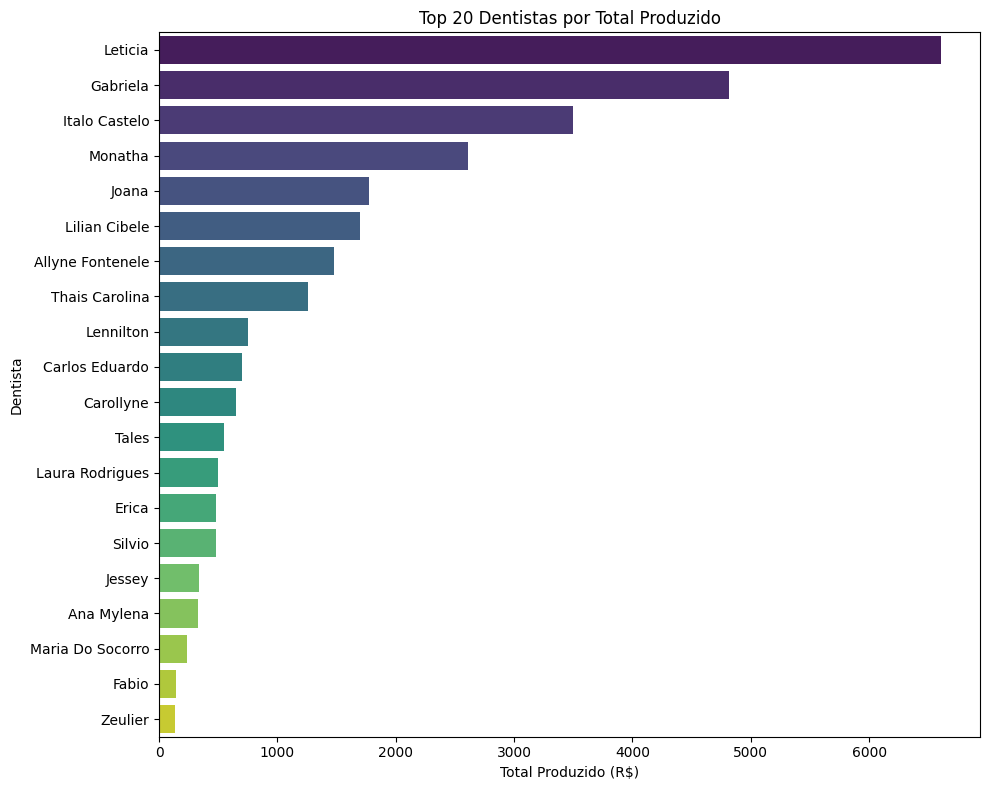

In [1279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar os 20 dentistas com maior total produzido
top20 = df_final.sort_values(by='Total_Produzido', ascending=False).head(20)

# Plotar o gráfico
plt.figure(figsize=(10, 8))
sns.barplot(data=top20, y='DENTISTA', x='Total_Produzido', palette='viridis')
plt.title('Top 20 Dentistas por Total Produzido')
plt.xlabel('Total Produzido (R$)')
plt.ylabel('Dentista')
plt.tight_layout()
plt.show()


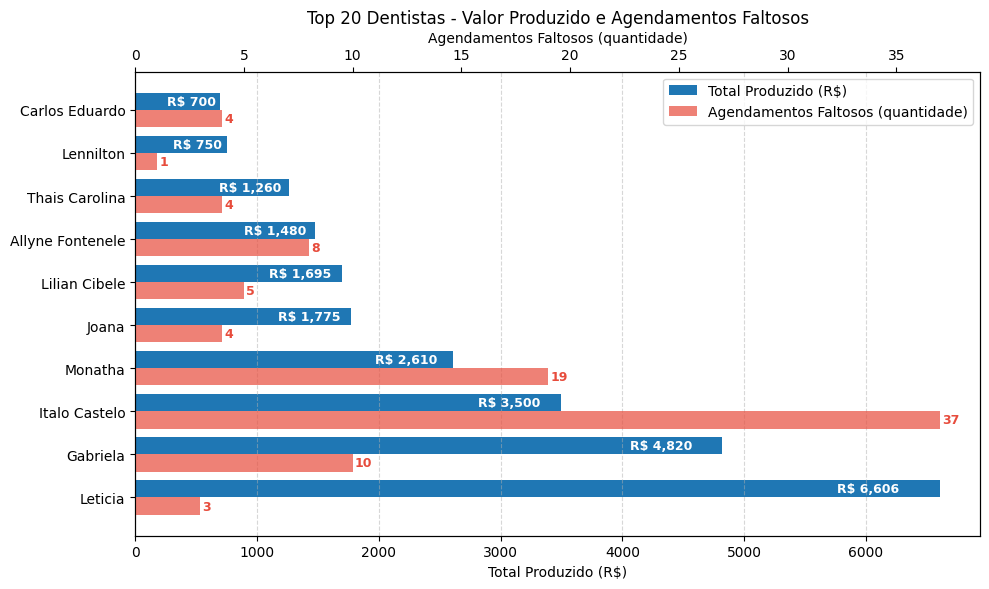

In [1288]:
import matplotlib.pyplot as plt
import numpy as np

# Selecionar os 20 dentistas com maior total produzido
top20 = df_final.sort_values(by='Total_Produzido', ascending=False).head(10).copy()
top20 = top20[::-1]  # inverter para melhor visualização

fig, ax1 = plt.subplots(figsize=(10, 6))  # diminui um pouco o tamanho da figura

y_pos = np.arange(len(top20))

bar_width = 0.4

# Barra 1: Total Produzido (R$)
bars_valor = ax1.barh(y_pos - bar_width/2, top20['Total_Produzido'], height=bar_width, color='#1f77b4', label='Total Produzido (R$)')

ax1.set_xlabel('Total Produzido (R$)')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top20['DENTISTA'])
ax1.invert_yaxis()
ax1.grid(axis='x', linestyle='--', alpha=0.5)
ax1.set_title('Top 20 Dentistas - Valor Produzido e Agendamentos Faltosos')

# Eixo secundário para quantidade de faltosos
ax2 = ax1.twiny()

bars_faltosos = ax2.barh(y_pos + bar_width/2, top20['Agendamentos_faltosos'], height=bar_width, color='#e74c3c', alpha=0.7, label='Agendamentos Faltosos (quantidade)')

ax2.set_xlabel('Agendamentos Faltosos (quantidade)')

# Labels nas barras
for bar in bars_valor:
    width = bar.get_width()
    ax1.text(width - width*0.05, bar.get_y() + bar.get_height()/2, f'R$ {width:,.0f}', va='center', ha='right', color='white', fontweight='bold', fontsize=9)

for bar in bars_faltosos:
    width = bar.get_width()
    if width > 0:
        ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', ha='left', color='#e74c3c', fontweight='bold', fontsize=9)

# Legenda combinada certinha no canto superior direito, uma embaixo da outra
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

plt.tight_layout()
plt.show()
